# 0. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from datetime import datetime, timedelta
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv("./interaction.csv")
data

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,deal_type,vst_dt,ma_fem_dv,ages,zon_hlv_user,zon_hlv,zon_mcls,pd_nm,clac_mcls_nm,clac_hlv_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1.0,0,NaN,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류상의,남성의류
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1.0,0,NaN,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방일회용품,주방잡화
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,0,NaN,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류상의,남성의류
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,0,NaN,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류상의,남성의류
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,0,NaN,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류상의,남성의류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983226,M470112503,210125110644545,2,A06,A069999,PD1947,20210125,11,51800.0,1.0,2,NaN,여성,50대,Z16,Z18,Z18,L07,A06,유통사
4983227,M470112503,210104210652271,2,A06,A069999,PD1947,20210104,21,6440.0,1.0,2,NaN,여성,50대,Z16,Z18,Z18,L07,A06,유통사
4983228,M748878049,210119200278240,1,A02,A029999,PD1943,20210119,20,17600.0,1.0,2,NaN,여성,30대,Z10,Z19,Z19,L03,A02,유통사
4983229,M748878049,210119180267206,1,A02,A029999,PD1943,20210119,18,12400.0,1.0,2,NaN,여성,30대,Z10,Z19,Z19,L03,A02,유통사


# 1. 유저 구매 행동 확인

## A.구매 행동을 확인하기 위해서 `DE_T` 생성

In [ ]:
data['de_dt'] = data['de_dt'].astype("str")
data["de_dt"] = pd.to_datetime(data['de_dt'])
data['de_t'] = data['de_dt'] + data["de_hr"].apply(lambda x : timedelta(hours = x))

## B. COP 데이터의 VST_DT

- 구매 행동을 확인할 때, VST_DT를 살펴보면 도움이될 수 있습니다.
- 하지만 전체 거래 중 `15572`개의 거래가 VST_DT가 DE_DT와 달라 이를 전부 확인하여 일반화하긴 힘들다고 판단하여
- `VST_DT` 정보는 활용하지 않았습니다.

## C. 가격 정보 활용
- 카테고리와 함께 상품의 특성으로 사용
  - 카테고리별 상대적 가격을 구해서 활용

In [ ]:
data = data.sort_values(by = "pd_c")
data

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,vst_dt,ma_fem_dv,ages,zon_hlv_user,zon_hlv,zon_mcls,pd_nm,clac_mcls_nm,clac_hlv_nm,de_t
1283912,M263273132,A02330512117,1,A02,A020104,PD0001,2021-03-15,18,53900.0,1.0,...,NaN,남성,30대,Z09,Z06,Z06002,소파,거실가구,가구,2021-03-15 18:00:00
544605,M182089956,A01389559136,1,A01,A010002,PD0001,2021-10-14,13,500000.0,1.0,...,NaN,여성,40대,Z17,Z17,Z17018,소파,거실가구,가구,2021-10-14 13:00:00
185663,M422491470,A01132567323,1,A01,A010002,PD0001,2021-04-12,18,250000.0,1.0,...,NaN,여성,50대,Z17,Z17,Z17018,소파,거실가구,가구,2021-04-12 18:00:00
339949,M843988289,A01242458002,1,A01,A010019,PD0001,2021-06-27,11,1067000.0,1.0,...,NaN,여성,40대,Z02,Z14,Z14002,소파,거실가구,가구,2021-06-27 11:00:00
185648,M422491470,A01132553825,1,A01,A010002,PD0001,2021-04-12,18,6242110.0,1.0,...,NaN,여성,50대,Z17,Z17,Z17018,소파,거실가구,가구,2021-04-12 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918127,M592391320,210312100675990,2,A06,A069999,PD1947,2021-03-12,10,453240.0,1.0,...,NaN,여성,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-12 10:00:00
4918126,M592391320,210318100663233,2,A06,A069999,PD1947,2021-03-18,10,176450.0,1.0,...,NaN,여성,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-18 10:00:00
4918125,M592391320,210312100675458,2,A06,A069999,PD1947,2021-03-12,10,34020.0,1.0,...,NaN,여성,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-12 10:00:00
4918134,M592391320,210325090663763,2,A06,A069999,PD1947,2021-03-25,9,138990.0,1.0,...,NaN,여성,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-25 09:00:00


In [ ]:
temp = data.groupby("pd_c")["buy_am"].apply(list)
temp = temp.reset_index()
temp

,pd_c,buy_am
0,PD0001,"[53900.0, 500000.0, 250000.0, 1067000.0, 62421..."
1,PD0002,"[7900.0, 49000.0, 24900.0, 200000.0, 7900.0, 1..."
2,PD0003,"[680000.0, 17900.0, 79900.0, 680000.0, 680000...."
3,PD0004,"[18900.0, 121920.0, 430000.0, 39920.0, 18900.0..."
4,PD0005,"[150000.0, 176000.0, 528000.0, 1045000.0, 1200..."
...,...,...
1942,PD1943,"[74160.0, 104000.0, 7900.0, 42980.0, 35200.0, ..."
1943,PD1944,"[29170.0, 4490.0, 51950.0, 12980.0, 6530.0, 17..."
1944,PD1945,"[1890.0, 5760.0, 3150.0, 8280.0, 4500.0, 2000...."
1945,PD1946,"[196840.0, 46170.0, 61700.0, 164900.0, 952940...."


### 1) Log scaling 진행
- 100원딜, 대량 구매 등 편차 보정

In [ ]:
data['buy_am_log'] = data['buy_am'].apply(np.log1p)
temp = data.groupby("pd_c")["buy_am_log"].apply(list)
temp = temp.reset_index()
temp

,pd_c,buy_am_log
0,PD0001,"[10.894904309600681, 13.122365377402328, 12.42..."
1,PD0002,"[8.974744612722734, 10.799595985047786, 10.122..."
2,PD0003,"[13.429849547739444, 9.792611856190192, 11.288..."
3,PD0004,"[9.846970109700957, 11.711128572986574, 12.971..."
4,PD0005,"[11.918397239722838, 12.07824495582233, 13.176..."
...,...,...
1942,PD1943,"[11.213993684506969, 11.552155793461898, 8.974..."
1943,PD1944,"[10.280930344070526, 8.409830673087738, 10.858..."
1944,PD1945,"[7.544861068658458, 8.658866349732383, 8.05547..."
1945,PD1946,"[12.190151575235248, 10.740107174352467, 11.03..."


### 2) 카테고리 내 상대적 가격을 구하기 위해서 Standardization 진행

In [ ]:
from sklearn import preprocessing

def std_scaling(data):
  """
  Standardization

  args
    - data :   Standardization 원하는 데이터
  """
  data = np.array(data)
  print(data.shape)
  std_scaler = preprocessing.StandardScaler().fit(data.reshape(-1, 1))
  scaled_data = std_scaler.transform(data.reshape(-1, 1))
  scaled_data = list(map(lambda x : x[0], scaled_data))
  return scaled_data

In [ ]:
temp['buy_am_std']= temp['buy_am_log'].apply(std_scaling)

(313,)
(190,)
(99,)
(80,)
(642,)
(143,)
(170,)
(26,)
(52,)
(391,)
(495,)
(65,)
(63,)
(39,)
(7,)
(2,)
(31,)
(46,)
(11,)
(2,)
(19,)
(26,)
(39,)
(3,)
(648,)
(43,)
(171,)
(3,)
(10,)
(8,)
(3,)
(206,)
(503,)
(750,)
(1664,)
(262,)
(101,)
(132,)
(3,)
(2,)
(257,)
(505,)
(12,)
(647,)
(2206,)
(30,)
(380,)
(175,)
(11,)
(64,)
(1355,)
(36,)
(228,)
(3316,)
(4,)
(609,)
(758,)
(438,)
(8,)
(142,)
(170,)
(6,)
(26,)
(128,)
(6,)
(1,)
(430,)
(1269,)
(359,)
(23,)
(8,)
(86,)
(46,)
(52,)
(36,)
(25,)
(507,)
(47,)
(69,)
(1932,)
(324,)
(3621,)
(884,)
(258,)
(32,)
(64,)
(463,)
(59,)
(2075,)
(1881,)
(393,)
(350,)
(1209,)
(97,)
(4241,)
(2955,)
(2964,)
(3100,)
(918,)
(851,)
(126,)
(1601,)
(25,)
(202,)
(81,)
(1,)
(467,)
(769,)
(303,)
(339,)
(36,)
(231,)
(4121,)
(2396,)
(10461,)
(5997,)
(457,)
(3508,)
(54,)
(27,)
(8,)
(53,)
(28,)
(18,)
(15,)
(182,)
(67,)
(77,)
(134,)
(319,)
(7,)
(44,)
(98,)
(485,)
(80,)
(730,)
(845,)
(340,)
(114,)
(880,)
(321,)
(484,)
(187,)
(15,)
(360,)
(1404,)
(5870,)
(8,)
(865,)
(175,)
(223,)
(1993,

In [ ]:
temp_price = []
for i in temp['buy_am_std']:
    temp_price.extend(i)

print(len(temp_price))    

4983231


In [ ]:
data['buy_am_std'] = temp_price
data

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,ages,zon_hlv_user,zon_hlv,zon_mcls,pd_nm,clac_mcls_nm,clac_hlv_nm,de_t,buy_am_log,buy_am_std
1283912,M263273132,A02330512117,1,A02,A020104,PD0001,2021-03-15,18,53900.0,1.0,...,30대,Z09,Z06,Z06002,소파,거실가구,가구,2021-03-15 18:00:00,10.894904,-1.664148
544605,M182089956,A01389559136,1,A01,A010002,PD0001,2021-10-14,13,500000.0,1.0,...,40대,Z17,Z17,Z17018,소파,거실가구,가구,2021-10-14 13:00:00,13.122365,-0.331863
185663,M422491470,A01132567323,1,A01,A010002,PD0001,2021-04-12,18,250000.0,1.0,...,50대,Z17,Z17,Z17018,소파,거실가구,가구,2021-04-12 18:00:00,12.429220,-0.746446
339949,M843988289,A01242458002,1,A01,A010019,PD0001,2021-06-27,11,1067000.0,1.0,...,40대,Z02,Z14,Z14002,소파,거실가구,가구,2021-06-27 11:00:00,13.880362,0.121508
185648,M422491470,A01132553825,1,A01,A010002,PD0001,2021-04-12,18,6242110.0,1.0,...,50대,Z17,Z17,Z17018,소파,거실가구,가구,2021-04-12 18:00:00,15.646829,1.178064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918127,M592391320,210312100675990,2,A06,A069999,PD1947,2021-03-12,10,453240.0,1.0,...,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-12 10:00:00,13.024179,2.521955
4918126,M592391320,210318100663233,2,A06,A069999,PD1947,2021-03-18,10,176450.0,1.0,...,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-18 10:00:00,12.080798,1.607677
4918125,M592391320,210312100675458,2,A06,A069999,PD1947,2021-03-12,10,34020.0,1.0,...,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-12 10:00:00,10.434733,0.012391
4918134,M592391320,210325090663763,2,A06,A069999,PD1947,2021-03-25,9,138990.0,1.0,...,40대,Z10,Z18,Z18,L07,A06,유통사,2021-03-25 09:00:00,11.842164,1.376404


- 각 카테고리별로 Standardization을 진행하여 `buy_am_std`가 정규 분포를 따르게 됩니다.

count    4.983231e+06
mean     3.375649e-16
std      9.999925e-01
min     -2.141424e+01
25%     -6.341685e-01
50%     -7.832998e-03
75%      6.058143e-01
max      1.163192e+01
Name: buy_am_std, dtype: float64


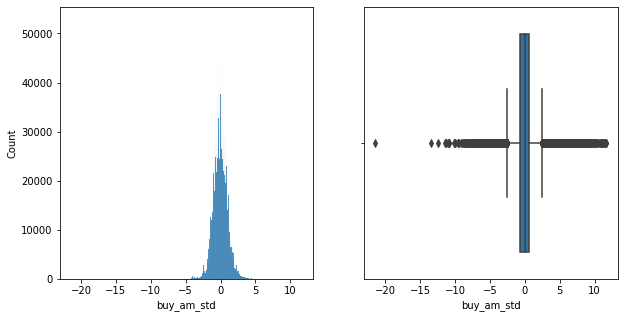

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(data = data, x = "buy_am_std", ax = axs[0])
sns.boxplot(data = data, x = "buy_am_std", ax = axs[1])
print(data['buy_am_std'].describe())

In [ ]:
bins = []
for i in [0.0015, 0.025, 0.16, 0.5, 0.84, 0.975, 0.9985]:
    bin = np.quantile(data.buy_am_std, i)
    print(f'{i*100}% : {bin}')
    bins.append(bin)

0.15% : -4.008353738145164
2.5% : -1.9070191404763317
16.0% : -0.9217668044639009
50.0% : -0.007832997542654055
84.0% : 0.9025150609847125
97.5% : 2.0181908914250495
99.85000000000001% : 3.9825871151723597


In [ ]:
data['buy_am_bins'] = 0

data.loc[data.buy_am_std < bins[0], "buy_am_bins"] = 0
data.loc[(data.buy_am_std >= bins[0]) & (data.buy_am_std < bins[1]), "buy_am_bins"] = 1
data.loc[(data.buy_am_std >= bins[1]) & (data.buy_am_std < bins[2]), "buy_am_bins"] = 2
data.loc[(data.buy_am_std >= bins[2]) & (data.buy_am_std < bins[3]), "buy_am_bins"] = 3
data.loc[(data.buy_am_std >= bins[3]) & (data.buy_am_std < bins[4]), "buy_am_bins"] = 4
data.loc[(data.buy_am_std >= bins[4]) & (data.buy_am_std < bins[5]), "buy_am_bins"] = 5
data.loc[(data.buy_am_std >= bins[5]) & (data.buy_am_std < bins[6]), "buy_am_bins"] = 6
data.loc[data.buy_am_std >= bins[6], "buy_am_bins"] = 7

data['buy_am_bins'].value_counts()

3    1694386
4    1694285
5     672743
2     672655
1     117245
6     117111
7       7479
0       7327
Name: buy_am_bins, dtype: int64

## D. 거래 데이터 확인

In [ ]:
data = data.sort_values(by = ["cust", "de_t"]).reset_index().drop(columns = ["index"])
data.head(5)

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,zon_hlv_user,zon_hlv,zon_mcls,pd_nm,clac_mcls_nm,clac_hlv_nm,de_t,buy_am_log,buy_am_std,buy_am_bins
0,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,19000.0,1.0,...,Z07,Z16,Z16003,남성런닝/트레이닝화,남성스포츠화,스포츠패션,2021-01-16 18:00:00,9.852247,-1.017923,2
1,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,59000.0,1.0,...,Z07,Z16,Z16003,남성런닝/트레이닝화,남성스포츠화,스포츠패션,2021-01-16 18:00:00,10.985310,0.027756,4
2,M000034966,A01016688590,1,A01,A010045,PD0796,2021-01-16,18,100.0,1.0,...,Z07,Z16,Z16003,스포츠아대/헤어밴드,스포츠잡화,스포츠패션,2021-01-16 18:00:00,4.615121,-0.826691,3
3,M000034966,A01016718167,1,A01,A010045,PD0816,2021-01-16,18,62100.0,1.0,...,Z07,Z16,Z16003,여성런닝/트레이닝화,여성스포츠화,스포츠패션,2021-01-16 18:00:00,11.036517,-0.009795,3
4,M000034966,A04003723283,1,A04,A043676,PD1161,2021-01-16,21,1200.0,1.0,...,Z07,Z16,Z16007,과일음료,과채음료,음료,2021-01-16 21:00:00,7.090910,-0.635002,3


### 1) 유저 당 구매 횟수

- 평균 : `166`, 중앙값 : `86`

[array([20.,  1.]), array([222., 525.])]
count    29874.000000
mean       166.808295
std        238.695057
min          1.000000
25%         20.000000
50%         86.000000
75%        222.000000
max      13636.000000
dtype: float64


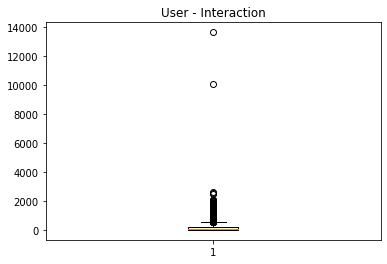

In [ ]:
import matplotlib.pyplot as plt

def whisker_plot(data, name):
  """
  Box Plot + Whiskers 출력

  args
    - data : boxplot 원하는 데이터
    - name : plt.title에 사용될 이름
  """
  b = plt.boxplot(data)
  plt.title(f"{name}")
  print([item.get_ydata() for item in b['whiskers']])
  print(data.describe())


whisker_plot(data.groupby(["cust"]).size(), "User - Interaction")

### 2) 같은 날에 구매한 횟수
- 평균 : `4.41`개, 중앙값 : `2`개

[array([1., 1.]), array([ 5., 11.])]
count    1.129850e+06
mean     4.410524e+00
std      5.331064e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      3.700000e+02
dtype: float64


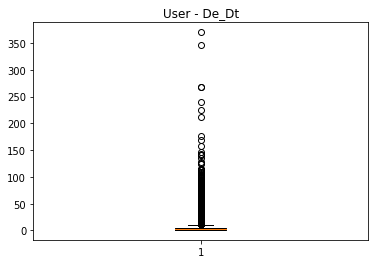

In [ ]:
whisker_plot(data.groupby(["cust", "de_dt"]).size(), "User - De_Dt")

### 3) 같은 시간에 구매된 횟수
- 평균 : `3.5`개,  중앙값 : `2`개

[array([1., 1.]), array([4., 8.])]
count    1.402279e+06
mean     3.553666e+00
std      4.573623e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.600000e+02
dtype: float64


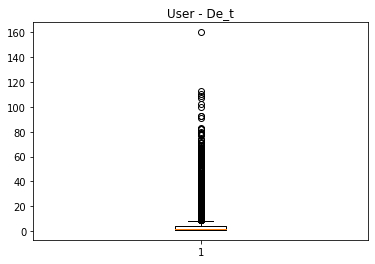

In [ ]:
whisker_plot(data.groupby(["cust", "de_t"]).size(), "User - De_t")

### 4) 행동(세션) 정의
- 오프라인 : 유통사/제휴사 변화가 없다면 동일한 행동으로 간주
- 온라인 : 시간 차가 존재하더라도 유통사를 구매했다면 동일한 행동으로 간주

In [ ]:
data['ts'] = data['de_t'].values.astype(np.int64) // 10 ** 9
data['dt'] = data['de_dt'].values.astype(np.int64) // (10 ** 9) // (3600 * 24)
cust_uid = dict(zip(data.cust.unique(), [i for i in range(data.cust.nunique())]))
cop_id = dict(zip(data.cop_c.unique(), [i for i in range(data.cop_c.nunique())]))

data['uid'] = data['cust'].apply(lambda x :cust_uid[x])
data['cop_id'] = data['cop_c'].apply(lambda x :cop_id[x])
# 변경 여부 확인
data['user_changed'] = data['uid'].diff().fillna(0)
data['time_diff'] = (data['ts']).diff().fillna(0)
data['cop_changed'] = data['cop_id'].diff().fillna(0)
data["on_off"] = data['chnl_dv'].diff().fillna(0)
data['day_changed'] = data['dt'].diff().fillna(0)
# 유저가 변경된 경우 처리
data.loc[data.user_changed != 0, "cop_changed"] = 0
data.loc[data.user_changed != 0, "time_diff"] = 0
data.loc[data.user_changed != 0, "on_off"] = 0
data.loc[data.user_changed != 0, "day_changed"] = 0
# 날이 변경된 경우 처리
data.loc[data.day_changed != 0, "cop_changed"] = 0
data.loc[data.day_changed != 0, "time_diff"] = 0
# 온/오프라인이 변경된 경우 처리
data.loc[data.on_off != 0, "time_diff"] = 0

data = data.drop(columns = ["uid", "ts", "dt","cop_id"], axis = 1)

##### 유통사의 온라인 구매 변화 양상 확인 

In [ ]:
pdde = data.loc[data.deal_type == 0].reset_index().drop(columns = ["index"])
pdde

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,clac_hlv_nm,de_t,buy_am_log,buy_am_std,buy_am_bins,user_changed,time_diff,cop_changed,on_off,day_changed
0,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,19000.0,1.0,...,스포츠패션,2021-01-16 18:00:00,9.852247,-1.017923,2,0.0,0.0,0.0,0.0,0.0
1,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,59000.0,1.0,...,스포츠패션,2021-01-16 18:00:00,10.985310,0.027756,4,0.0,0.0,0.0,0.0,0.0
2,M000034966,A01016688590,1,A01,A010045,PD0796,2021-01-16,18,100.0,1.0,...,스포츠패션,2021-01-16 18:00:00,4.615121,-0.826691,3,0.0,0.0,0.0,0.0,0.0
3,M000034966,A01016718167,1,A01,A010045,PD0816,2021-01-16,18,62100.0,1.0,...,스포츠패션,2021-01-16 18:00:00,11.036517,-0.009795,3,0.0,0.0,0.0,0.0,0.0
4,M000034966,A04003723283,1,A04,A043676,PD1161,2021-01-16,21,1200.0,1.0,...,음료,2021-01-16 21:00:00,7.090910,-0.635002,3,0.0,10800.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M999962961,A03073554254,1,A03,A030118,PD0159,2021-12-31,13,3500.0,1.0,...,과일,2021-12-31 13:00:00,8.160804,-2.802092,1,0.0,0.0,0.0,0.0,0.0
4381739,M999962961,A03073555430,1,A03,A030118,PD0388,2021-12-31,13,1980.0,1.0,...,대용식,2021-12-31 13:00:00,7.591357,-0.366733,3,0.0,0.0,0.0,0.0,0.0
4381740,M999962961,A03073554254,1,A03,A030118,PD0947,2021-12-31,13,7990.0,1.0,...,양곡,2021-12-31 13:00:00,8.986071,-0.647301,3,0.0,0.0,0.0,0.0,0.0
4381741,M999962961,A03073555430,1,A03,A030118,PD1290,2021-12-31,13,4980.0,1.0,...,조미료,2021-12-31 13:00:00,8.513386,0.484420,4,0.0,0.0,0.0,0.0,0.0


[array([3600., 3600.]), array([25200., 57600.])]
count    10726.000000
mean     17929.517061
std      16750.845158
min       3600.000000
25%       3600.000000
50%      10800.000000
75%      25200.000000
max      82800.000000
Name: time_diff, dtype: float64


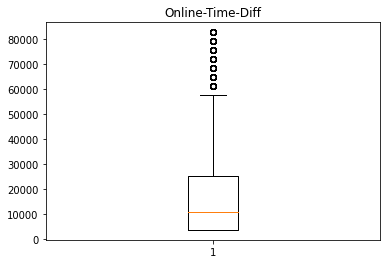

In [ ]:
whisker_plot(pdde.loc[(pdde.chnl_dv == 2) & (pdde.time_diff != 0)].time_diff, "Online-Time-Diff")

In [ ]:
def trans_item(x):
  """
  전환 아이템 확인
  """
  item_list = []
  for idx, row in x.iterrows():
    temp = []
    temp = [pdde.loc[idx - 1].clac_hlv_nm, pdde.loc[idx].clac_hlv_nm]
    temp = str(temp)
    item_list.append(temp)
    temp = []
  
  return pd.Series(item_list).value_counts()

##### 시간 차가 증가하더라도 이전 구매 품목과 큰 차이가 없음
- 유통사의 경우 시간 차가 존재해도 동일한 행동으로 간주

In [ ]:
trans_item(pdde.loc[(pdde.chnl_dv == 2) & (pdde.time_diff >= 3600) & (pdde.time_diff <= 10800)])

['상품권', '상품권']               560
['축산물', '과일']                185
['채소', '과일']                  90
['축산물', '과자']                 76
['패션잡화', '패션잡화']              68
                            ... 
['주류', '청소/세탁/욕실용품']           1
['유제품', '아웃도어/레저']             1
['냉동식품', '대용식']                1
['청소/세탁/욕실용품', '인테리어/조명']      1
['건해산물', '대용식']                1
Length: 1309, dtype: int64

In [ ]:
trans_item(pdde.loc[(pdde.chnl_dv == 2) & (pdde.time_diff > 10800) & (pdde.time_diff >= 28800)])

['상품권', '상품권']              144
['축산물', '과일']                75
['채소', '과일']                 37
['여성의류', '여성의류']             34
['축산물', '건해산물']              31
                           ... 
['화장품/뷰티케어', '구기/필드스포츠']      1
['침구/수예', '생활/주방가전']          1
['출산/육아용품', '공구/안전용품']        1
['유아동의류', '서적/음반/악기']         1
['생활/주방가전', '냉장/세탁가전']        1
Length: 1000, dtype: int64

In [ ]:
trans_item(pdde.loc[(pdde.chnl_dv == 2) & (pdde.time_diff > 28800) & (pdde.time_diff < 82800)])

['상품권', '상품권']              106
['축산물', '과일']                60
['채소', '과일']                 31
['여성의류', '여성의류']             28
['화장품/뷰티케어', '화장품/뷰티케어']     23
                           ... 
['출산/육아용품', '식기/조리기구']        1
['모바일', '패션잡화']               1
['기타(비상품)', '상품권']            1
['유제품', '채소']                 1
['생활/주방가전', '냉장/세탁가전']        1
Length: 889, dtype: int64

In [ ]:
trans_item(pdde.loc[(pdde.chnl_dv == 2) & (pdde.time_diff >= 82800)])

['여성의류', '과자']           1
['채소', '건해산물']           1
['상품권', '건해산물']          1
['청소/세탁/욕실용품', '과일']     1
['축산물', '과일']            1
['상품권', '퍼스널케어']         1
['유아동의류', '화장품/뷰티케어']    1
['모바일', '축산물']           1
['컴퓨터', '컴퓨터']           1
['퍼스널케어', '냉동식품']        1
['채소', '과자']             1
['과일', '수산물']            1
['건강식품', '커피/차']         1
['여성의류', '건강용품']         1
['스포츠패션', '유아동의류']       1
['대용식', '음료']            1
['여성의류', '건해산물']         1
['패션잡화', '건강식품']         1
['상품권', '축산물']           1
['속옷/양말/홈웨어', '건강용품']    1
['조미료', '과일']            1
['상품권', '냉동식품']          1
['원예/애완', '퍼스널케어']       1
['패션잡화', '스포츠패션']        1
['유아동의류', '유아동의류']       1
['축산물', '과자']            1
['축산물', '화장품/뷰티케어']      1
['조미료', '상품권']           1
['남성의류', '여성의류']         1
['축산물', '건해산물']          1
['테넌트/음식점', '대용식']       1
['식기/조리기구', '건강식품']      1
['유아식품', '상품권']          1
['출산/육아용품', '축산물']       1
['기타(비상품)', '과일']        1
['건강식품', '과일']           1
['유아식품', '패션잡화']         1
[

In [ ]:
session_id = 0

def make_sessions(x):
    """
    유저 별 세션 정의
    """
    global session_id
    # 유저 변경 시 초기화
    if x['user_changed'] != 0:
        session_id = 0
        return session_id
    else:
      # 날짜 전환
      if x['day_changed'] != 0:
        session_id += 1
        return session_id
      # 온/오프라인 전환 경우
      if x["on_off"] != 0:
        session_id += 1
        return session_id
      # 오프라인
      else:
        if x['chnl_dv'] == 0:
          if x['time_diff']:
            session_id +=1
            # 동일 유통사에 있을 경우
            if x['cop_changed'] == 0:
              session_id -= 1
            return session_id
        # 온라인
        else:
          if x["day_changed"] != 0:
            session_id += 1
            return session_id
          # 변경됐을 경우
          if x['cop_changed'] != 0:
            # pdde인 경우
            if x['deal_type'] == 0:
              return session_id
            else:
              session_id += 1
              return session_id

    return session_id

data['session_id'] = data.apply(make_sessions, axis=1)
data

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,de_t,buy_am_log,buy_am_std,buy_am_bins,user_changed,time_diff,cop_changed,on_off,day_changed,session_id
0,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,19000.0,1.0,...,2021-01-16 18:00:00,9.852247,-1.017923,2,0.0,0.0,0.0,0.0,0.0,0
1,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,59000.0,1.0,...,2021-01-16 18:00:00,10.985310,0.027756,4,0.0,0.0,0.0,0.0,0.0,0
2,M000034966,A01016688590,1,A01,A010045,PD0796,2021-01-16,18,100.0,1.0,...,2021-01-16 18:00:00,4.615121,-0.826691,3,0.0,0.0,0.0,0.0,0.0,0
3,M000034966,A01016718167,1,A01,A010045,PD0816,2021-01-16,18,62100.0,1.0,...,2021-01-16 18:00:00,11.036517,-0.009795,3,0.0,0.0,0.0,0.0,0.0,0
4,M000034966,A04003723283,1,A04,A043676,PD1161,2021-01-16,21,1200.0,1.0,...,2021-01-16 21:00:00,7.090910,-0.635002,3,0.0,10800.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983226,M999962961,A03073554254,1,A03,A030118,PD0159,2021-12-31,13,3500.0,1.0,...,2021-12-31 13:00:00,8.160804,-2.802092,1,0.0,0.0,0.0,0.0,0.0,103
4983227,M999962961,A03073555430,1,A03,A030118,PD0388,2021-12-31,13,1980.0,1.0,...,2021-12-31 13:00:00,7.591357,-0.366733,3,0.0,0.0,0.0,0.0,0.0,103
4983228,M999962961,A03073554254,1,A03,A030118,PD0947,2021-12-31,13,7990.0,1.0,...,2021-12-31 13:00:00,8.986071,-0.647301,3,0.0,0.0,0.0,0.0,0.0,103
4983229,M999962961,A03073555430,1,A03,A030118,PD1290,2021-12-31,13,4980.0,1.0,...,2021-12-31 13:00:00,8.513386,0.484420,4,0.0,0.0,0.0,0.0,0.0,103


#### 행동(세션)당 구매 횟수
- 평균 : `4.02`, 중앙값 : `2`

[array([1., 1.]), array([ 5., 11.])]
count    1.238098e+06
mean     4.024908e+00
std      5.086619e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      3.700000e+02
dtype: float64


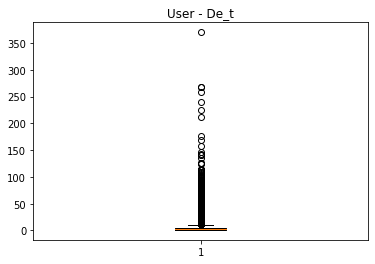

In [ ]:
whisker_plot(data.groupby(["cust", "session_id"]).size(), "User - De_t")

## E. 모델 입력 구성

- 유저 정보 : `ma_fem_dv`, `ages`, `zon_hlv_user`
- 카테고리 정보 : `pd_c`, `clac_mcls_nm`, `clac_hlv_nm`
- Context 정보 : `buy_am_bins`, `cop_c`

In [ ]:
data = data[["cust", "cop_c", "pd_c", "ma_fem_dv", "ages", "clac_mcls_nm", "clac_hlv_nm", "buy_am_bins", "session_id", "zon_hlv_user", "de_t"]]
data

,cust,cop_c,pd_c,ma_fem_dv,ages,clac_mcls_nm,clac_hlv_nm,buy_am_bins,session_id,zon_hlv_user,de_t
0,M000034966,A01,PD0777,여성,40대,남성스포츠화,스포츠패션,2,0,Z07,2021-01-16 18:00:00
1,M000034966,A01,PD0777,여성,40대,남성스포츠화,스포츠패션,4,0,Z07,2021-01-16 18:00:00
2,M000034966,A01,PD0796,여성,40대,스포츠잡화,스포츠패션,3,0,Z07,2021-01-16 18:00:00
3,M000034966,A01,PD0816,여성,40대,여성스포츠화,스포츠패션,3,0,Z07,2021-01-16 18:00:00
4,M000034966,A04,PD1161,여성,40대,과채음료,음료,3,0,Z07,2021-01-16 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4983226,M999962961,A03,PD0159,여성,50대,견과류,과일,1,103,Z17,2021-12-31 13:00:00
4983227,M999962961,A03,PD0388,여성,50대,건면,대용식,3,103,Z17,2021-12-31 13:00:00
4983228,M999962961,A03,PD0947,여성,50대,잡곡,양곡,3,103,Z17,2021-12-31 13:00:00
4983229,M999962961,A03,PD1290,여성,50대,소스류,조미료,4,103,Z17,2021-12-31 13:00:00


- 데이터 저장

In [ ]:
data.to_csv("sdm_input_8.csv", index = False)

# 2.추천 모델

- [SDM](https://arxiv.org/pdf/1909.00385.pdf) 
  - 유저의 특성을 포함하여 Sequential 추천이 가능한 모델
  - 추천에 user의 long term preference와 short term preference를 동시에 반영
  - Two-Tower 모델
    - 유저 임베딩을 얻고 이를 활용할 수 있음
    - cold-start 유저에 대해서도 추천 가능

## A.패키지 설치

In [ ]:
!pip install faiss-cpu # embedding matching
!pip uninstall -y -q tensorflow
!pip install -q tensorflow-gpu==2.5.0
!pip install -q deepmatch
!pip install argparse

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepctr 0.9.1 requires h5py==2.10.0, but you have h5py 3.1.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.5.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import random
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

#import seaborn as sns
from deepctr.feature_column import SparseFeat, VarLenSparseFeat
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model

from deepmatch.models import *
from deepmatch.utils import sampledsoftmaxloss, NegativeSampler

2022-09-30 15:28:35.052176: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## B.데이터 불러오기

In [ ]:
data = pd.read_csv("./sdm_input_8.csv")
data = data.sort_values(by = ["cust", "de_t"]).reset_index().drop(columns = ["index"])
data.head(5)

,cust,cop_c,pd_c,ma_fem_dv,ages,clac_mcls_nm,clac_hlv_nm,buy_am_bins,session_id,zon_hlv_user,de_t
0,M000034966,A01,PD0777,여성,40대,남성스포츠화,스포츠패션,2,0,Z07,2021-01-16 18:00:00
1,M000034966,A01,PD0777,여성,40대,남성스포츠화,스포츠패션,4,0,Z07,2021-01-16 18:00:00
2,M000034966,A01,PD0796,여성,40대,스포츠잡화,스포츠패션,3,0,Z07,2021-01-16 18:00:00
3,M000034966,A01,PD0816,여성,40대,여성스포츠화,스포츠패션,3,0,Z07,2021-01-16 18:00:00
4,M000034966,A04,PD1161,여성,40대,과채음료,음료,3,0,Z07,2021-01-16 21:00:00


## C.특성/하이퍼 파라미터 설정

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 1024):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

my_seed = 1024
my_seed_everywhere(my_seed)

sparse_feats = ['cust','pd_c','ma_fem_dv', 'ages', 'zon_hlv_user', 'clac_hlv_nm', 'clac_mcls_nm', "cop_c", "buy_am_bins"]

demo_feats = ["ma_fem_dv", "ages", "zon_hlv_user"]
item_feats = ["pd_c", "clac_mcls_nm", "clac_hlv_nm", "cop_c", "buy_am_bins"]

args = {
    "seq_len" : 20,
    "seq_len_short" : 5,
    "seq_len_prefer" : 20,
    "neg_sample" : 200,
    "embedding_dim" : 64,
    "batch_size" : 512,
    "epochs" : 20,
    "file_name" : "all-cat",
}

In [ ]:
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter

def gen_data_sdm(data : list, item_feats : list, seq_short_max_len=5, seq_prefer_max_len=20):
    """
    SDM에 사용할 Data 구성
    """
    train_set = []
    valid_set = []
    test_set = []

    for cust, hist in tqdm(data.groupby('cust')):
        feats_list = [hist[i].tolist() for i in item_feats]
        
        session_list = hist['session_id'].tolist()
        session_len = Counter(session_list)
        time_list = hist['de_t'].tolist()
        
        cur_session = session_list[0]
        for i in range(len(feats_list[0])):
            if cur_session != session_list[i] or i == 0:
                # 세션 변경
                cur_session = session_list[i]
                seq_short_len = 0
            # 내역 저장
            hist_list = [feats[:i + 1] for feats in feats_list]

            seq_short_len = min(seq_short_len ,seq_short_max_len)
            seq_prefer_len = min(max(i - seq_short_max_len + 1, 0), seq_prefer_max_len)
            time = time_list[i]
            if time < "2021-11-15":
                short_list = [hist[::-1][:seq_short_len][::-1] for hist in hist_list]
                prefer_list = [hist[::-1][seq_short_max_len:(seq_short_max_len + seq_prefer_len)][::-1] for hist in hist_list]

                train_set.append(
                    (cust, hist_list[0][i], 1, seq_short_len,
                     seq_prefer_len,
                     *short_list,
                     *prefer_list)
                     )
            else:
                break  
            seq_short_len += 1
            
        valid_set.append(train_set.pop())
        if len(feats_list[0]) != 1:
            test_set.append(train_set.pop())

    random.shuffle(train_set)

    print(len(train_set[0]), len(valid_set[0]), len(test_set[0]))

    return train_set, valid_set, test_set
    

def gen_user_feats(demo_feats, act_feats, feats_max_idx):
    
    user_feats = []
    # DEMO 입력
    for feat in demo_feats:
        user_feats.append(
            SparseFeat(feat, feats_max_idx[feat], args['embedding_dim'] // 2)
        )
    # ACT 입력
    for feat in act_feats:
        user_feats.append(
            VarLenSparseFeat(SparseFeat(f"short_{feat}", feats_max_idx[feat], args['embedding_dim'], embedding_name = f"short_{feat}"),
                             args['seq_len_short'], "mean", "short_sess_length")
        )
        user_feats.append(
            VarLenSparseFeat(SparseFeat(f"prefer_{feat}", feats_max_idx[feat], args['embedding_dim'], embedding_name = f"prefer_{feat}"),
                             args['seq_len_prefer'], "mean", "prefer_sess_length")
                        )
    return user_feats
    

def gen_model_input_sdm(data : list, user_profile : list, seq_short_max_len, seq_prefer_max_len, demo_feats : list, item_feats : list):
    """
    model 입력 구성
    """
    cust = np.array([line[0] for line in data])
    pd = np.array([line[1] for line in data])
    label = np.array([line[2] for line in data])

    short_len = np.array([line[3] for line in data])
    prefer_len = np.array([line[4] for line in data])
    
    short_list = [[line[i] for i in range(5, 5 + len(item_feats))] for line in data]
    short_list = [pad_sequences(line, maxlen = seq_short_max_len, padding = "post", truncating="post", value = 0) for line in short_list]
    
    prefer_list = [[line[i] for i in range(5 + len(item_feats), len(data[0]))] for line in data]
    prefer_list = [pad_sequences(line, maxlen = seq_prefer_max_len, padding = "post", truncating="post", value = 0) for line in prefer_list]

    model_input = {"cust" : cust, "pd_c" : pd, "prefer_sess_length" : prefer_len, "short_sess_length" : short_len}

    for cat in short_list:
        for name, hist in zip(item_feats, cat):
            temp_name = f"short_{name}"
            if temp_name not in model_input:
                model_input[temp_name] = []
            model_input[temp_name].append(hist)
    
    for cat in prefer_list:
        for name, hist in zip(item_feats, cat):
            temp_name = f"prefer_{name}"
            if temp_name not in model_input:
                model_input[temp_name] = []
            model_input[temp_name].append(hist)      

    for name in item_feats:
        model_input[f'short_{name}'] = np.array(model_input[f'short_{name}'])
        model_input[f'prefer_{name}'] = np.array(model_input[f'prefer_{name}'])
        
    for key in demo_feats:
        model_input[key] = user_profile.loc[model_input['cust']][key].values

    return model_input, label

## D.모델 입력 데이터 생성

In [ ]:
# 라벨 인코딩 진행
label_encoder = {}
feats_max_idx = {}
for feature in sparse_feats:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])
    label_encoder[feature] = lbe
    feats_max_idx[feature] = data[feature].max() + 1

feats = sparse_feats

user_profile = data[feats].drop_duplicates('cust')
item_profile = data[["pd_c"]].drop_duplicates('pd_c')

user_profile.set_index("cust", inplace=True)

train_set, valid_set, test_set = gen_data_sdm(data, item_feats = item_feats, seq_short_max_len=args['seq_len_short'], seq_prefer_max_len=args['seq_len_prefer'])

100%|██████████| 29874/29874 [01:07<00:00, 445.69it/s]


15 15 15


In [ ]:
train_model_input, train_label = gen_model_input_sdm(train_set, user_profile, args['seq_len_short'], args['seq_len_prefer'], demo_feats, item_feats)
valid_model_input, valid_label = gen_model_input_sdm(valid_set, user_profile, args['seq_len_short'], args['seq_len_prefer'], demo_feats, item_feats)
test_model_input, test_label = gen_model_input_sdm(test_set, user_profile, args['seq_len_short'], args['seq_len_prefer'], demo_feats, item_feats)

# 유저 정보 정의 : DEMO + 구매 행동
user_feature_columns = gen_user_feats(demo_feats, item_feats, feats_max_idx)

item_feature_columns = [SparseFeat('pd_c', feats_max_idx['pd_c'], args['embedding_dim'])]

from collections import Counter

train_counter = Counter(train_model_input['pd_c'])
item_count = [train_counter.get(i,0) for i in range(item_feature_columns[0].vocabulary_size)]
sampler_config = NegativeSampler('adaptive',num_sampled=args['neg_sample'],item_name="pd_c",item_count=item_count)

## E.훈련 진행
- 11월 14일까지의 거래 데이터

In [ ]:
if tf.__version__ >= '2.0.0':
    tf.compat.v1.disable_eager_execution()
else:
    K.set_learning_phase(True)

from keras.callbacks import ModelCheckpoint

model_path = 'final-{epoch:02d}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1)

# 모델 정의 및 훈련
model = SDM(user_feature_columns, item_feature_columns, history_feature_list=['pd_c','clac_mcls_nm', "clac_hlv_nm", "cop_c", "buy_am_bins"],
            units=args['embedding_dim'], sampler_config=sampler_config)

model.compile(optimizer="adam", loss=sampledsoftmaxloss)

history = model.fit(x = train_model_input, y = train_label, validation_data = (valid_model_input, valid_label),\
                batch_size=args['batch_size'], epochs=args['epochs'], verbose=1, callbacks = [cb_checkpoint])

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2022-09-30 15:40:56.750685: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-09-30 15:40:56.782367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 15:40:56.782819: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.837GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2022-09-30 15:40:56.782835: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-30 15:40:56.784710: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-09-30 15:40:56.784752: I tensorflow/stream_executor/pl

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Train on 4371465 samples, validate on 29874 samples
Epoch 1/20


2022-09-30 15:41:02.396950: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 15:41:02.397847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 15:41:02.398351: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.837GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2022-09-30 15:41:02.398406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

   6144/4371465 [..............................] - ETA: 20:18 - loss: 10.7853

2022-09-30 15:41:03.849834: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-09-30 15:41:03.849885: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


4370944/4371465 [============================>.] - ETA: 0s - loss: 1.4563
Epoch 00001: saving model to final-01.hdf5
4371465/4371465 [==============================] - 174s 40us/sample - loss: 1.4563 - val_loss: 1.6555
Epoch 2/20
4370432/4371465 [============================>.] - ETA: 0s - loss: 1.0845
Epoch 00002: saving model to final-02.hdf5
4371465/4371465 [==============================] - 170s 39us/sample - loss: 1.0845 - val_loss: 1.6269
Epoch 3/20
4370944/4371465 [============================>.] - ETA: 0s - loss: 1.0212
Epoch 00003: saving model to final-03.hdf5
4371465/4371465 [==============================] - 173s 40us/sample - loss: 1.0212 - val_loss: 1.6188
Epoch 4/20
4370944/4371465 [============================>.] - ETA: 0s - loss: 1.0010
Epoch 00004: saving model to final-04.hdf5
4371465/4371465 [==============================] - 176s 40us/sample - loss: 1.0010 - val_loss: 1.6329
Epoch 5/20
4370944/4371465 [============================>.] - ETA: 0s - loss: 0.9898
Epoch 

### 1) 결과 확인

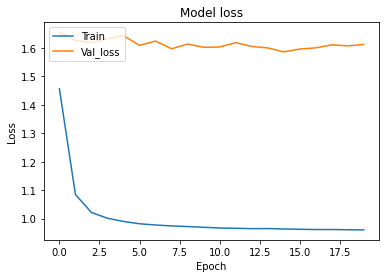

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

### 2) 검증 데이터 확인

In [ ]:
valid_user_model_input = valid_model_input
all_item_model_input = {"pd_c": item_profile['pd_c'].values,}

user_embedding_model = Model(inputs=model.user_input, outputs=model.user_embedding)
item_embedding_model = Model(inputs=model.item_input, outputs=model.item_embedding)

valid_user_emb = user_embedding_model.predict(valid_user_model_input, batch_size=2 ** 12)
valid_item_emb = item_embedding_model.predict(all_item_model_input, batch_size=2 ** 12)

print(valid_user_emb.shape)
print(valid_item_emb.shape)

(29874, 64)
(1947, 64)


In [ ]:
import numpy as np

def get_hr(gt_item, pred_items):
    """
    HitRate
    """
    if gt_item in pred_items:
        return 1
    return 0

def get_ndcg(gt_item, pred_items):
    """
    nDCG
    """
    if gt_item in pred_items:
        index = pred_items.index(gt_item)
        return np.reciprocal(np.log2(index+2))
    return 0

def get_metrics(user_pred, label_list, k):
  HR, nDCG = [], []
  for uid, pred in user_pred.items():
    label = label_list[uid]
    HR.append(get_hr(label, pred[:k]))
    nDCG.append(get_ndcg(label ,pred[:k]))

  print(f"nDCG@{k}:", np.mean(nDCG))  
  print(f"hit rate@{k}:", np.mean(HR))

def get_entropy(valid_pred_list, k = 5):
    pd_num = data.pd_c.nunique()
    pd_cnt = dict(zip(range(pd_num), [0] * pd_num))

    pd_sum = 0
    for lst in valid_pred_list:
        for i in lst[:k]:
            if i in pd_cnt:
                pd_cnt[i] += 1
                pd_sum += 1
    pd_prob = [(v / pd_sum) for k, v in pd_cnt.items()]
    entropy = -sum([p * np.log(p) for p in pd_prob if p != 0])
    return entropy

In [ ]:
import faiss

def emb_matching(user_emb, item_emb, label, embedding_dim, user_model_input, k = 5):
    index = faiss.IndexFlatIP(embedding_dim)
    faiss.normalize_L2(item_emb)
    index.add(item_emb)
    faiss.normalize_L2(user_emb)
    
    D, I = index.search(np.ascontiguousarray(user_emb), 20)
    
    user_pred = {}
    HR, nDCG = [], []
    
    for i, uid in tqdm(enumerate(user_model_input['cust'])):
        try:
            pred = [item_profile['pd_c'].values[x] for x in I[i]]
            user_pred[uid] = pred
        except:
            continue
    
    return user_pred

valid_true_label = {line[0]:[line[1]] for line in valid_set}
valid_user_pred = emb_matching(valid_user_emb, valid_item_emb, valid_true_label, args['embedding_dim'], valid_user_model_input, k = 5)

29874it [00:00, 37280.98it/s]


In [ ]:
import pickle

def save_file(data, name):
    with open(f'{name}.pk', 'wb') as fw:
        pickle.dump(data, fw)

def load_file(name):
    with open(f'{name}.pk', 'rb') as fr:
        data = pickle.load(fr)
    return data

#### 결과 저장

In [ ]:
save_file(valid_user_pred, "valid_user_pred")
save_file(valid_true_label, "valid_label")

valid_user_pred = load_file("valid_user_pred")
valid_true_label = load_file("valid_label")

#### 추천 정확도 확인
- nDCG@5 : 0.600
- HR@5 : 0.718

In [ ]:
get_metrics(valid_user_pred, valid_true_label, 5)

nDCG@5: 0.724562362705428
hit rate@5: 0.7813794039780055


#### 추천 다양성 확인

1 : 4.565738747816315
2 : 4.873234161096384
3 : 4.994664690812805
4 : 5.100459902291239
5 : 5.190075329703301
6 : 5.261392545641272
7 : 5.323579312170551
8 : 5.374046229772619
9 : 5.419581525388591
10 : 5.460891185441012
11 : 5.499002462365185
12 : 5.5355582618822075
13 : 5.568023859476195
14 : 5.598747087241302
15 : 5.624995241446787
16 : 5.650759824517833
17 : 5.675654170839207
18 : 5.700944810193726
19 : 5.723290471705195
20 : 5.7456413369223736
0.30749541328006913
0.1214305297164211
0.10579521147843352
0.08961542741206241
0.07131721593797025
0.06218676652927968
0.05046691760206734
0.04553529561597269
0.04130966005242076
0.038111276924173154
0.03655579951702226
0.032465597593987816
0.030723227765106387
0.02624815420548554
0.025764583071046232
0.024894346321373995
0.025290639354518696
0.022345661511469217
0.022350865217178217


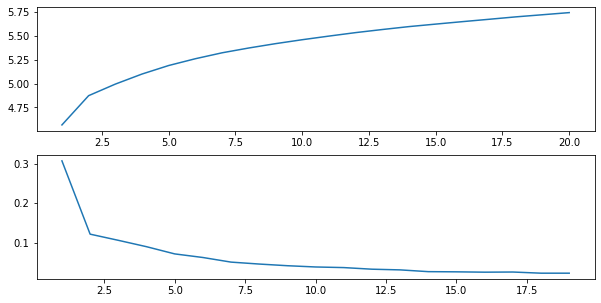

In [ ]:
import matplotlib.pyplot as plt

entropy_list = []
for i in range(1, 21):
    entropy = get_entropy(valid_user_pred.values(), k = i)
    print(f"{i} : {entropy}")
    entropy_list.append(entropy)

entropy_dif = []
for idx, e in enumerate(entropy_list):
    if idx == 0:
        continue
    dif = e - entropy_list[idx - 1]
    print(dif)
    entropy_dif.append(dif)
    
fig, axs = plt.subplots(2, 1, figsize = (10, 5))
axs[0].plot(range(1, 21), entropy_list)
axs[1].plot(range(1, 20), entropy_dif)

### 3) 테스트 데이터 확인

In [ ]:
test_user_model_input = test_model_input
all_item_model_input = {"pd_c": item_profile['pd_c'].values,}

user_embedding_model = Model(inputs=model.user_input, outputs=model.user_embedding)
item_embedding_model = Model(inputs=model.item_input, outputs=model.item_embedding)

test_user_emb = user_embedding_model.predict(test_user_model_input, batch_size=2 ** 12)
test_item_emb = item_embedding_model.predict(all_item_model_input, batch_size=2 ** 12)

print(test_user_emb.shape)
print(test_item_emb.shape)

(28368, 64)
(1947, 64)


In [ ]:
import numpy as np

def get_hr(gt_item, pred_items):
    """
    HitRate
    """
    if gt_item in pred_items:
        return 1
    return 0

def get_ndcg(gt_item, pred_items):
    """
    nDCG
    """
    if gt_item in pred_items:
        index = pred_items.index(gt_item)
        return np.reciprocal(np.log2(index+2))
    return 0

def get_metrics(user_pred, label_list, k):
  HR, nDCG = [], []
  for uid, pred in user_pred.items():
    label = label_list[uid]
    HR.append(get_hr(label, pred[:k]))
    nDCG.append(get_ndcg(label ,pred[:k]))

  print(f"nDCG@{k}:", np.mean(nDCG))  
  print(f"hit rate@{k}:", np.mean(HR))

def get_entropy(valid_pred_list, k = 5):
    pd_num = data.pd_c.nunique()
    pd_cnt = dict(zip(range(pd_num), [0] * pd_num))

    pd_sum = 0
    for lst in valid_pred_list:
        for i in lst[:k]:
            if i in pd_cnt:
                pd_cnt[i] += 1
                pd_sum += 1
    pd_prob = [(v / pd_sum) for k, v in pd_cnt.items()]
    entropy = -sum([p * np.log(p) for p in pd_prob if p != 0])
    return entropy

In [ ]:
import faiss

def emb_matching(user_emb, item_emb, label, embedding_dim, user_model_input, k = 5):
    index = faiss.IndexFlatIP(embedding_dim)
    faiss.normalize_L2(item_emb)
    index.add(item_emb)
    faiss.normalize_L2(user_emb)
    
    D, I = index.search(np.ascontiguousarray(user_emb), 20)
    
    user_pred = {}
    HR, nDCG = [], []
    
    for i, uid in tqdm(enumerate(user_model_input['cust'])):
        try:
            pred = [item_profile['pd_c'].values[x] for x in I[i]]
            user_pred[uid] = pred
        except:
            continue
    
    return user_pred

test_true_label = {line[0]:[line[1]] for line in test_set}
test_user_pred = emb_matching(test_user_emb, test_item_emb, test_true_label, args['embedding_dim'], test_user_model_input, k = 5)

28368it [00:00, 36547.21it/s]


In [ ]:
save_file(test_user_pred, "test_user_pred")
save_file(test_true_label, "test_label")

test_user_pred = load_file("test_user_pred")
test_true_label = load_file("test_label")

In [ ]:
get_metrics(test_user_pred, test_true_label, 5)

nDCG@5: 0.7377683724155231
hit rate@5: 0.7842646848649422


1 : 4.901547909933319
2 : 5.10850996899746
3 : 5.203500352456926
4 : 5.289069222116709
5 : 5.364259450712263
6 : 5.428209199631757
7 : 5.485637699225197
8 : 5.532719594372031
9 : 5.574434956617739
10 : 5.610682422146806
11 : 5.645183579384193
12 : 5.678492262587172
13 : 5.707605706319439
14 : 5.736133824297956
15 : 5.760810530978512
16 : 5.785375339823229
17 : 5.807950970782678
18 : 5.8312887404963885
19 : 5.851638491054194
20 : 5.8721986077620585
0.206962059064141
0.09499038345946609
0.08556886965978272
0.07519022859555413
0.06394974891949445
0.05742849959344021
0.047081895146833475
0.04171536224570804
0.03624746552906721
0.034501157237387226
0.03330868320297853
0.02911344373226754
0.0285281179785164
0.024676706680556215
0.024564808844717234
0.022575630959448922
0.023337769713710266
0.020349750557805635
0.020560116707864395


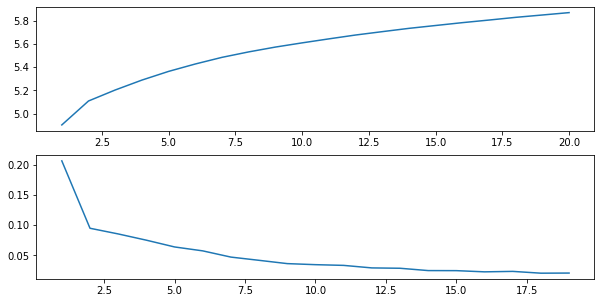

: 

In [ ]:
import matplotlib.pyplot as plt

entropy_list = []
for i in range(1, 21):
    entropy = get_entropy(test_user_pred.values(), k = i)
    print(f"{i} : {entropy}")
    entropy_list.append(entropy)

entropy_dif = []
for idx, e in enumerate(entropy_list):
    if idx == 0:
        continue
    dif = e - entropy_list[idx - 1]
    print(dif)
    entropy_dif.append(dif)
    
fig, axs = plt.subplots(2, 1, figsize = (10, 5))
axs[0].plot(range(1, 21), entropy_list)
axs[1].plot(range(1, 20), entropy_dif)

## F.유저 임베딩 추출

In [ ]:
import random
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

#import seaborn as sns
from deepctr.feature_column import SparseFeat, VarLenSparseFeat
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model

from deepmatch.models import *
from deepmatch.utils import sampledsoftmaxloss, NegativeSampler

In [ ]:
data = pd.read_csv("./sdm_input_8.csv")
data = data.sort_values(by = ["cust", "de_t"]).reset_index().drop(columns = ["index"])
data.head(5)

,cust,cop_c,pd_c,ma_fem_dv,ages,clac_mcls_nm,clac_hlv_nm,buy_am_bins,session_id,zon_hlv_user,de_t
0,M000034966,A01,PD0777,여성,40대,남성스포츠화,스포츠패션,2,0,Z07,2021-01-16 18:00:00
1,M000034966,A01,PD0777,여성,40대,남성스포츠화,스포츠패션,4,0,Z07,2021-01-16 18:00:00
2,M000034966,A01,PD0796,여성,40대,스포츠잡화,스포츠패션,3,0,Z07,2021-01-16 18:00:00
3,M000034966,A01,PD0816,여성,40대,여성스포츠화,스포츠패션,3,0,Z07,2021-01-16 18:00:00
4,M000034966,A04,PD1161,여성,40대,과채음료,음료,3,0,Z07,2021-01-16 21:00:00


In [ ]:
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter

def gen_data_sdm(data : list, item_feats : list, seq_short_max_len=5, seq_prefer_max_len=20):
    """
    SDM에 사용할 Data 구성
    """
    train_set = []
    embed_set = []

    for cust, hist in tqdm(data.groupby('cust')):
        feats_list = [hist[i].tolist() for i in item_feats]
        
        session_list = hist['session_id'].tolist()
        session_len = Counter(session_list)
        time_list = hist['de_t'].tolist()
        
        cur_session = session_list[0]
        for i in range(len(feats_list[0])):
            if cur_session != session_list[i] or i == 0:
                # 세션 변경
                cur_session = session_list[i]
                seq_short_len = 0
            # 내역 저장
            hist_list = [feats[:i + 1] for feats in feats_list]

            seq_short_len = min(seq_short_len ,seq_short_max_len)
            seq_prefer_len = min(max(i - seq_short_max_len + 1, 0), seq_prefer_max_len)
            time = time_list[i]
            if time < "2021-11-15":
                short_list = [hist[::-1][:seq_short_len][::-1] for hist in hist_list]
                prefer_list = [hist[::-1][seq_short_max_len:(seq_short_max_len + seq_prefer_len)][::-1] for hist in hist_list]

                train_set.append(
                    (cust, hist_list[0][i], 1, seq_short_len,
                     seq_prefer_len,
                     *short_list,
                     *prefer_list)
                     )
            else:
                break
            seq_short_len += 1
        embed_set.append(train_set[-1])
    random.shuffle(train_set)

    print(len(train_set[0]), (len(embed_set[0])))

    return train_set, embed_set
    

def gen_user_feats(demo_feats :list, item_feats, feats_max_idx):
    
    user_feats = []
    # DEMO 입력
    for feat in demo_feats:
        user_feats.append(
            SparseFeat(feat, feats_max_idx[feat], args['embedding_dim'] // 2)
        )
    # ACT 입력
    for feat in item_feats:
        user_feats.append(
            VarLenSparseFeat(SparseFeat(f"short_{feat}", feats_max_idx[feat], args['embedding_dim'], embedding_name = f"short_{feat}"),
                             args['seq_len_short'], "mean", "short_sess_length")
        )
        user_feats.append(
            VarLenSparseFeat(SparseFeat(f"prefer_{feat}", feats_max_idx[feat], args['embedding_dim'], embedding_name = f"prefer_{feat}"),
                             args['seq_len_prefer'], "mean", "prefer_sess_length")
                        )
    return user_feats
    

def gen_model_input_sdm(data : list, user_profile : list, seq_short_max_len : int, seq_prefer_max_len : int, demo_feats : list, item_feats : list):
    """
    model 입력 구성
    """
    cust = np.array([line[0] for line in data])
    pd = np.array([line[1] for line in data])
    label = np.array([line[2] for line in data])

    short_len = np.array([line[3] for line in data])
    prefer_len = np.array([line[4] for line in data])
    
    short_list = [[line[i] for i in range(5, 5 + len(item_feats))] for line in data]
    short_list = [pad_sequences(line, maxlen = seq_short_max_len, padding = "post", truncating="post", value = 0) for line in short_list]
    
    prefer_list = [[line[i] for i in range(5 + len(item_feats), len(data[0]))] for line in data]
    prefer_list = [pad_sequences(line, maxlen = seq_prefer_max_len, padding = "post", truncating="post", value = 0) for line in prefer_list]

    model_input = {"cust" : cust, "pd_c" : pd, "prefer_sess_length" : prefer_len, "short_sess_length" : short_len}
    
    for cat in short_list:
        for name, hist in zip(item_feats, cat):
            temp_name = f"short_{name}"
            if temp_name not in model_input:
                model_input[temp_name] = []
            model_input[temp_name].append(hist)
    
    for cat in prefer_list:
        for name, hist in zip(item_feats, cat):
            temp_name = f"prefer_{name}"
            if temp_name not in model_input:
                model_input[temp_name] = []
            model_input[temp_name].append(hist)      

    for name in item_feats:
        model_input[f'short_{name}'] = np.array(model_input[f'short_{name}'])
        model_input[f'prefer_{name}'] = np.array(model_input[f'prefer_{name}'])
        
    for key in demo_feats:
        model_input[key] = user_profile.loc[model_input['cust']][key].values

    return model_input, label

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 1024):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

my_seed = 1024
my_seed_everywhere(my_seed)

sparse_feats = ['cust','pd_c','ma_fem_dv', 'ages', 'zon_hlv_user', 'clac_hlv_nm', 'clac_mcls_nm', "cop_c", "buy_am_bins"]

demo_feats = ["ma_fem_dv", "ages", "zon_hlv_user"]
item_feats = ["pd_c", "clac_mcls_nm", "clac_hlv_nm", "cop_c", "buy_am_bins"]

args = {
    "seq_len" : 20,
    "seq_len_short" : 5,
    "seq_len_prefer" : 20,
    "neg_sample" : 200,
    "embedding_dim" : 64,
    "batch_size" : 512,
    "epochs" : 20,
    "file_name" : "all-cat",
}

In [ ]:
# 라벨 인코딩 진행
label_encoder = {}
feats_max_idx = {}
for feature in sparse_feats:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])
    label_encoder[feature] = lbe
    feats_max_idx[feature] = data[feature].max() + 1

feats = sparse_feats

user_profile = data[feats].drop_duplicates('cust')
item_profile = data[["pd_c"]].drop_duplicates('pd_c')

user_profile.set_index("cust", inplace=True)
train_set, embed_set = gen_data_sdm(data, seq_short_max_len=args['seq_len_short'], seq_prefer_max_len=args['seq_len_prefer'], item_feats=item_feats)

100%|██████████| 29874/29874 [01:09<00:00, 431.00it/s]


15 15


In [ ]:
train_model_input, train_label = gen_model_input_sdm(train_set, user_profile, args['seq_len_short'], args['seq_len_prefer'], demo_feats, item_feats)
embed_model_input, _ = gen_model_input_sdm(embed_set, user_profile, args['seq_len_short'], args['seq_len_prefer'], demo_feats, item_feats)

# 유저 정보 정의 : DEMO + 행동
user_feature_columns = gen_user_feats(demo_feats, item_feats, feats_max_idx)

item_feature_columns = [SparseFeat('pd_c', feats_max_idx['pd_c'], args['embedding_dim'])]

from collections import Counter

train_counter = Counter(train_model_input['pd_c'])
item_count = [train_counter.get(i,0) for i in range(item_feature_columns[0].vocabulary_size)]
sampler_config = NegativeSampler('adaptive',num_sampled=args['neg_sample'],item_name="pd_c",item_count=item_count)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
if tf.__version__ >= '2.0.0':
    tf.compat.v1.disable_eager_execution()
else:
    K.set_learning_phase(True)

from keras.callbacks import ModelCheckpoint

model_path = 'final-{epoch:02d}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1)

# 모델 정의 및 훈련
model = SDM(user_feature_columns, item_feature_columns, history_feature_list=['pd_c','clac_mcls_nm', "clac_hlv_nm", "cop_c", "buy_am_bins"],
            units=args['embedding_dim'], sampler_config=sampler_config)

model.compile(optimizer="adam", loss=sampledsoftmaxloss)

history = model.fit(x = train_model_input, y = train_label, batch_size=args['batch_size'], epochs=args['epochs'], verbose=1, callbacks = [cb_checkpoint])

Train on 4429707 samples
Epoch 1/20
4429707/4429707 [==============================] - ETA: 0s - loss: 1.4211
Epoch 00001: saving model to final-01.hdf5
4429707/4429707 [==============================] - 171s 39us/sample - loss: 1.4211
Epoch 2/20
4429707/4429707 [==============================] - ETA: 0s - loss: 1.0842
Epoch 00002: saving model to final-02.hdf5
4429707/4429707 [==============================] - 160s 36us/sample - loss: 1.0842
Epoch 3/20
4429312/4429707 [============================>.] - ETA: 0s - loss: 1.0298
Epoch 00003: saving model to final-03.hdf5
4429707/4429707 [==============================] - 158s 36us/sample - loss: 1.0298
Epoch 4/20
4429312/4429707 [============================>.] - ETA: 0s - loss: 1.0107
Epoch 00004: saving model to final-04.hdf5
4429707/4429707 [==============================] - 161s 36us/sample - loss: 1.0107
Epoch 5/20
4429707/4429707 [==============================] - ETA: 0s - loss: 1.0015
Epoch 00005: saving model to final-05.hdf5
442

In [ ]:
user_model_input = embed_model_input
all_item_model_input = {"pd_c": item_profile['pd_c'].values,}

user_embedding_model = Model(inputs=model.user_input, outputs=model.user_embedding)
item_embedding_model = Model(inputs=model.item_input, outputs=model.item_embedding)

user_emb = user_embedding_model.predict(user_model_input, batch_size=2 ** 12)
item_emb = item_embedding_model.predict(all_item_model_input, batch_size=2 ** 12)

In [ ]:
def get_user_emb(emb):
    temp = pd.DataFrame(emb)
    temp['cust'] = label_encoder['cust'].inverse_transform([i for i in range(len(emb))])
    temp = temp.set_index(["cust"])
    temp = temp.reset_index()
    return temp

In [ ]:
def get_item_emb(emb):
    temp = pd.DataFrame(emb)
    temp['pd_c'] = label_encoder['pd_c'].inverse_transform([i for i in range(len(emb))])
    temp = temp.set_index(["pd_c"])
    temp = temp.reset_index()
    return temp

In [ ]:
user_emb = get_user_emb(user_emb)
user_emb.to_csv("user_emb_64.csv")
user_emb.head()

,cust,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,M000034966,-0.121070,-0.062030,-0.015647,0.032578,-0.014015,-0.000852,0.024420,0.001338,0.005392,...,0.023706,-0.003718,0.191494,-0.040410,-0.095292,-0.028855,0.068207,0.077863,-0.007420,-0.055064
1,M000059535,0.020232,0.027472,-0.002671,0.042620,0.022260,0.003135,-0.012955,0.001615,0.005095,...,0.020817,-0.057277,0.069895,0.025756,-0.036550,-0.015001,-0.001014,0.035068,0.043614,-0.007426
2,M000136117,-0.000953,-0.038075,-0.190898,-0.046859,0.259060,-0.011161,0.257341,-0.008735,-0.014675,...,0.178364,-0.025407,-0.222288,-0.022259,-0.036384,-0.228755,-0.468037,-0.028282,-0.047153,0.034636
3,M000201112,-0.000191,-0.005522,0.076736,0.019532,0.162435,-0.000765,-0.123342,0.030111,0.243223,...,-0.266457,0.000244,-0.071724,0.067874,-0.044137,-0.062469,-0.018685,-0.013637,-0.000396,-0.002651
4,M000225114,-0.001410,-0.007409,-0.162857,0.172728,-0.181073,-0.004588,-0.025422,0.019590,-0.034528,...,-0.296283,-0.032646,-0.178274,0.014006,0.017919,0.157569,0.122902,-0.228083,-0.006965,-0.002914


In [ ]:
item_emb = get_item_emb(item_emb)
item_emb.to_csv("item_emb_64.csv")
item_emb.head()

,pd_c,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,PD0001,0.042313,-0.011560,0.159039,0.287296,-0.138690,0.015596,0.153424,-0.036754,-0.154939,...,0.229796,0.068254,-0.231498,0.001521,-0.010263,0.213306,-0.144447,-0.045531,0.042969,-0.086645
1,PD0002,-0.013453,0.002019,0.067434,-0.081472,-0.014089,-0.088975,-0.152589,0.062074,0.073904,...,0.141980,0.116239,-0.372502,-0.093871,0.036536,0.014509,-0.224452,0.182490,-0.076710,0.037910
2,PD0003,-0.010039,-0.003568,-0.029781,0.176244,-0.070441,0.010962,0.176998,0.284040,-0.100761,...,0.003153,-0.021868,-0.185090,0.124228,0.011540,-0.094923,-0.386840,0.008265,-0.014065,0.010839
3,PD0004,0.000578,-0.033308,0.031936,0.121581,0.205081,-0.002252,0.058852,-0.190332,-0.197833,...,0.117169,-0.002286,0.039186,-0.061370,-0.043377,0.008277,-0.285120,-0.094189,-0.029769,0.011561
4,PD0005,0.030660,0.047322,0.106710,-0.184434,-0.161920,0.014583,-0.268267,-0.336913,0.061829,...,0.171703,0.104094,0.254875,0.041361,0.087656,0.021423,0.127077,-0.222057,0.048991,-0.098399
